In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [219]:
df = pd.read_csv('final.csv')
df

,Unnamed: 0,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,...,Calculated_Tare_Weight,Weight_With_Cat,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time
0,0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11,Ryan,6589.0,urination,1,0,2020-09-05,...,8209.750,14798.750,0.025000,44.124942,44.099942,2,0.025000,44.124942,44.149942,44.174942
1,1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37,Ryan,6935.0,urination,1,1,2020-07-18,...,6798.000,13733.000,0.025000,52.550000,52.525000,2,0.025000,52.550000,52.575000,52.700000
2,2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43,Ryan,5139.0,urination,1,0,2020-09-03,...,8740.625,13879.625,1.374937,45.249949,43.875012,2,1.374937,45.249949,45.424949,45.474949
3,3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05,Ryan,6983.0,non_elimination,1,0,2020-09-01,...,8790.925,15773.925,0.025000,9.949937,9.924937,1,0.025000,9.949937,0.025000,9.949937
4,4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11,Ryan,7017.0,urination,1,1,2020-08-08,...,4761.950,11778.950,0.025000,49.150000,49.125000,1,0.025000,49.150000,0.025000,49.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18,Sparkler,4116.0,urination,1,0,2021-08-24,...,7033.025,11149.025,0.025000,48.583258,48.558258,1,0.025000,48.583258,0.025000,48.583258
13071,13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01,Sparkler,4604.0,non_elimination,1,0,2021-04-26,...,7752.700,12356.700,54.638859,68.894917,14.256058,3,54.288859,54.463859,71.333398,71.358398
13072,13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55,Sparkler,4416.0,urination,1,0,2021-04-27,...,7598.075,12014.075,0.025000,77.293402,77.268402,1,0.025000,77.293402,0.025000,77.293402
13073,13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57,Sparkler,4386.0,defecation,1,0,2021-09-02,...,6333.825,10719.825,0.025000,194.417593,194.392593,2,0.025000,194.417593,194.492593,194.542593


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              13075 non-null  int64  
 1   Device_ID               13075 non-null  object 
 2   Event_ID                13075 non-null  object 
 3   Event_start_time        13075 non-null  object 
 4   Name_of_cat             12829 non-null  object 
 5   Weight_of_cat           13075 non-null  float64
 6   Activity                13072 non-null  object 
 7   Cat_In_Box              13075 non-null  int64  
 8   Synapse_Labeled         13075 non-null  int64  
 9   Event_Date              13075 non-null  object 
 10  Given_Tare_Weight       12062 non-null  float64
 11  Activity_Duration       13075 non-null  float64
 12  Calculated_Tare_Weight  13075 non-null  float64
 13  Weight_With_Cat         13075 non-null  float64
 14  Stepping_In_Time        13075 non-null

In [221]:
df = df[df['Activity'].notnull()].reset_index()
df = df[df['Device_ID']!=''].reset_index()
df['Elimination'] = df['Activity'].apply(lambda x: 0 if(x=='non_elimination') else 1)
df['Urination'] = df['Activity'].apply(lambda x: 1 if(x=='urination') else 0)
df

,index,Unnamed: 0,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,...,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Elimination,Urination
0,0,0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11,Ryan,6589.0,urination,1,0,...,0.025000,44.124942,44.099942,2,0.025000,44.124942,44.149942,44.174942,1,1
1,1,1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37,Ryan,6935.0,urination,1,1,...,0.025000,52.550000,52.525000,2,0.025000,52.550000,52.575000,52.700000,1,1
2,2,2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43,Ryan,5139.0,urination,1,0,...,1.374937,45.249949,43.875012,2,1.374937,45.249949,45.424949,45.474949,1,1
3,3,3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05,Ryan,6983.0,non_elimination,1,0,...,0.025000,9.949937,9.924937,1,0.025000,9.949937,0.025000,9.949937,0,0
4,4,4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11,Ryan,7017.0,urination,1,1,...,0.025000,49.150000,49.125000,1,0.025000,49.150000,0.025000,49.150000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13067,13070,13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18,Sparkler,4116.0,urination,1,0,...,0.025000,48.583258,48.558258,1,0.025000,48.583258,0.025000,48.583258,1,1
13068,13071,13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01,Sparkler,4604.0,non_elimination,1,0,...,54.638859,68.894917,14.256058,3,54.288859,54.463859,71.333398,71.358398,0,0
13069,13072,13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55,Sparkler,4416.0,urination,1,0,...,0.025000,77.293402,77.268402,1,0.025000,77.293402,0.025000,77.293402,1,1
13070,13073,13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57,Sparkler,4386.0,defecation,1,0,...,0.025000,194.417593,194.392593,2,0.025000,194.417593,194.492593,194.542593,1,0


In [222]:
#X1 = df[['Sit_Time']]
#[['Name_of_cat', 'Sit_Time', 'Times_Stepped', 'Weight_of_cat']]
#cols = df[['Name_of_cat', 'Sit_Time', 'Weight_of_cat']]

<AxesSubplot:>

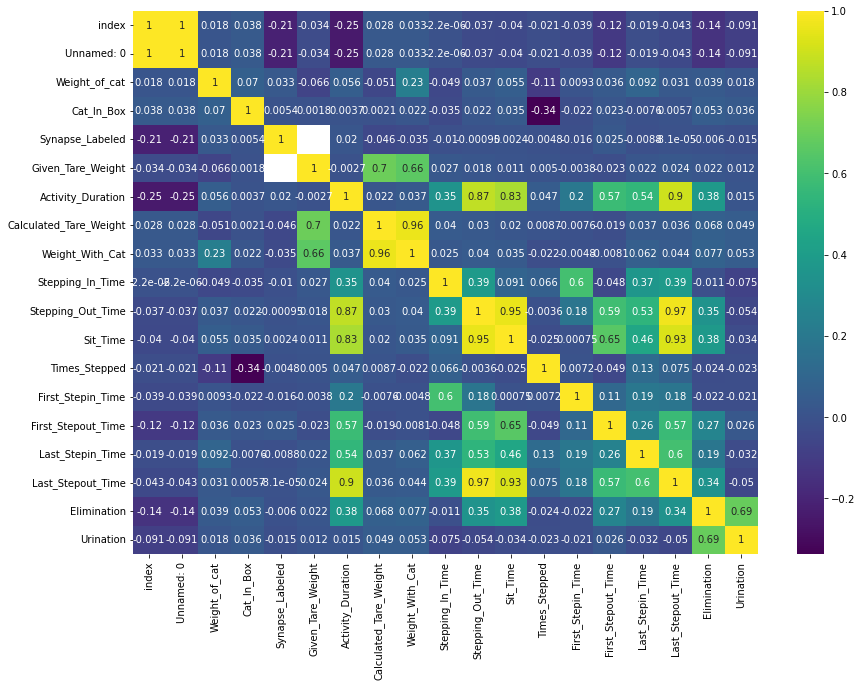

In [223]:
plt.figure(figsize=(14,10))
cor = df.corr()
sns.heatmap(cor, cmap = 'viridis',annot=True)

# First Model

In [224]:
#X1 = df[['Sit_Time']]
#[['Name_of_cat', 'Sit_Time', 'Times_Stepped', 'Weight_of_cat']]
X1 = df[['Name_of_cat', 'Sit_Time', 'Weight_of_cat', 'Device_ID', 'Stepping_In_Time']]
y1 = df['Elimination']

In [225]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
transformed = ohe.fit_transform(X1[['Name_of_cat']])

X1[ohe.categories_[0]] = transformed.toarray()
X1 = X1.drop(columns = ['Name_of_cat'])

ohe = OneHotEncoder()
transformed = ohe.fit_transform(X1[['Device_ID']])

X1[ohe.categories_[0]] = transformed.toarray()
X1 = X1.drop(columns = ['Device_ID'])

C:\Users\kaushik.agrawal\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [226]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=10)

In [227]:
X1_train

,Sit_Time,Weight_of_cat,Stepping_In_Time,Abby,Azure,Betty Lou,Bill,Boots,Bucks,Cartman,...,VB00000000000183,VB00000000000184,VB00000000000185,VB00000000000186,VB00000000000187,VB00000000000188,VB00000000000189,VB00000000000190,VB00000000000191,VB00000000000192
5003,94.524940,5978.0,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7484,77.508890,3738.0,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,20.399932,2456.0,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,70.175000,3712.0,4.975000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8567,31.132773,5749.0,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,19.890438,4619.0,38.855749,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1344,85.249950,5039.0,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12815,67.310654,5780.0,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7293,58.064748,4009.0,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
y1_train.value_counts()

1    7148
0    3309
Name: Elimination, dtype: int64

In [229]:
'''from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=10)
clf1.fit(X1_train, y1_train)'''

'from sklearn.tree import DecisionTreeClassifier\nclf1 = DecisionTreeClassifier(random_state=10)\nclf1.fit(X1_train, y1_train)'

In [230]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators = 5, random_state=10)
clf1.fit(X1_train, y1_train)

RandomForestClassifier(n_estimators=5, random_state=10)

In [231]:
test1_pred = clf1.predict(X1_test)
train1_pred = clf1.predict(X1_train)

In [232]:
from sklearn.metrics import classification_report

print(classification_report(y1_test, test1_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       837
           1       0.88      0.93      0.90      1778

    accuracy                           0.86      2615
   macro avg       0.85      0.82      0.83      2615
weighted avg       0.86      0.86      0.86      2615



In [233]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y1_test, test1_pred).ravel()
(tn, fp, fn, tp)

(604, 233, 133, 1645)

In [234]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.860038240917782

In [235]:
'''# Display plots inline and change default figure size
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
# Train the RandomForestClassifier
# Plot the decision boundary
plot_decision_boundary(lambda x: clf1.predict(X1_test))
plt.title("Random Forest")'''

'# Display plots inline and change default figure size\nimport matplotlib\n%matplotlib inline\nmatplotlib.rcParams[\'figure.figsize\'] = (10.0, 8.0)\n# Train the RandomForestClassifier\n# Plot the decision boundary\nplot_decision_boundary(lambda x: clf1.predict(X1_test))\nplt.title("Random Forest")'

In [236]:
from sklearn.metrics import classification_report

print(classification_report(y1_train, train1_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3309
           1       0.98      0.99      0.98      7148

    accuracy                           0.98     10457
   macro avg       0.98      0.97      0.98     10457
weighted avg       0.98      0.98      0.98     10457



In [237]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y1_train, train1_pred).ravel()
(tn, fp, fn, tp)

(3148, 161, 61, 7087)

In [238]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.9787702017787129

# Second Model

In [239]:
X_pred = clf1.predict(X1)

In [240]:
df['Elimination_Pred'] = X_pred
df2 = df[df['Elimination_Pred']==1]

In [241]:
X2 = df2[['Name_of_cat', 'Sit_Time' ,'Weight_of_cat', 'Stepping_In_Time']]
y2 = df2['Urination']

In [242]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
transformed = ohe.fit_transform(X2[['Name_of_cat']])

X2[ohe.categories_[0]] = transformed.toarray()
X2 = X2.drop(columns = ['Name_of_cat'])

C:\Users\kaushik.agrawal\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [243]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=20)

In [244]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators = 5, random_state=20)
clf2.fit(X2_train, y2_train)

RandomForestClassifier(n_estimators=5, random_state=20)

In [245]:
test2_pred = clf2.predict(X2_test)
train2_pred = clf2.predict(X2_train)

In [246]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, test2_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       546
           1       0.84      0.86      0.85      1280

    accuracy                           0.79      1826
   macro avg       0.75      0.74      0.75      1826
weighted avg       0.79      0.79      0.79      1826



In [247]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y2_test, test2_pred).ravel()
(tn, fp, fn, tp)

(339, 207, 173, 1107)

In [248]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.791894852135816

In [249]:
from sklearn.metrics import classification_report

print(classification_report(y2_train, train2_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2130
           1       0.98      0.98      0.98      5170

    accuracy                           0.97      7300
   macro avg       0.97      0.96      0.97      7300
weighted avg       0.97      0.97      0.97      7300



In [250]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y2_train, train2_pred).ravel()
(tn, fp, fn, tp)

(2008, 122, 80, 5090)

In [251]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.9723287671232876